In [2]:
from gecam.data.evt import Evt
from gecam.data.detector import Detector, GRD, CPD
from gecam.data.curve import NetLightCurve
from gecam.fitting.base_polynomial_fitter import BasePolynomialFitter
from gecam.plot.gecam_plot import GecamPlot
from gecam.time import GecamMet, HxmtMet, HebsMet
from gecam.analysis.burst_duration2 import BurstDuration

import numpy as np
import matplotlib.pyplot as plt
import copy

In [6]:
a=np.loadtxt(r"C:\Users\10500\Documents\WeChat Files\wxid_6638676386812\FileStorage\File\2022-11\hemeletotallc.txt")

In [7]:
a.shape

(200, 3)

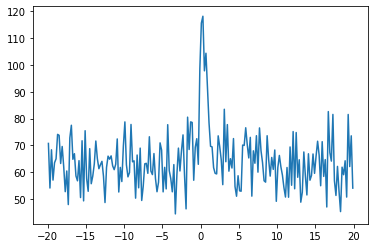

In [4]:
plt.plot(a[:,0],a[:,1])

In [6]:
np.diff(a[:,0])

array([0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999999,
       0.19999999, 0.19999999, 0.20000005, 0.19999999, 0.19999

In [7]:
aa=a[:,0]

In [13]:
np.append(aa,aa[-1]+np.diff(aa)[-1])

array([-19.89999998, -19.69999999, -19.5       , -19.29999995,
       -19.09999996, -18.89999998, -18.69999999, -18.5       ,
       -18.29999995, -18.09999996, -17.89999998, -17.69999999,
       -17.5       , -17.29999995, -17.09999996, -16.89999998,
       -16.69999999, -16.5       , -16.29999995, -16.09999996,
       -15.89999998, -15.69999999, -15.5       , -15.29999995,
       -15.09999996, -14.89999998, -14.69999999, -14.5       ,
       -14.29999995, -14.09999996, -13.89999998, -13.69999999,
       -13.5       , -13.29999995, -13.09999996, -12.89999998,
       -12.69999999, -12.5       , -12.29999995, -12.09999996,
       -11.89999998, -11.69999999, -11.5       , -11.29999995,
       -11.09999996, -10.89999998, -10.69999999, -10.5       ,
       -10.29999995, -10.09999996,  -9.89999998,  -9.69999999,
        -9.5       ,  -9.29999995,  -9.09999996,  -8.89999998,
        -8.69999999,  -8.5       ,  -8.29999995,  -8.09999996,
        -7.89999998,  -7.69999999,  -7.5       ,  -7.29

In [32]:
evt_path = r"D:\sougou_download\gbg_evt_tn210511_112749_fb_v00.fits"
evt = Evt.open(evt_path)
evt.info.trig_met=0

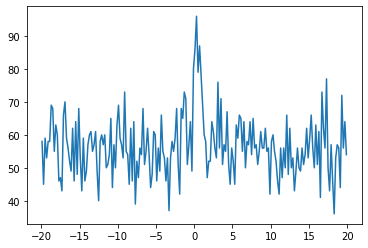

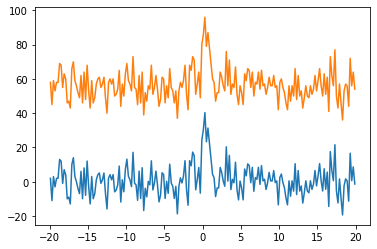

In [78]:
# %load_ext autoreload
# %autoreload 2
lc_bg_range=[
    [-20,-1],[3,20]
]

duration_obj = BurstDuration()
dets_net_lc_dic,cumsum_lc_data = duration_obj.cal_net_light_curve_cumsum(evt, [GRD(1)], None, None, lc_bg_range=lc_bg_range,
                                               lc_channel_range=None,
                                               bg_fit_method="2pass", bg_fit_order=1, only_recommend=True,
                                               lc_time_range=None)

In [39]:
cumsum_lc_data

(array([-19.89999998, -19.69999999, -19.5       , -19.29999995,
        -19.09999996, -18.89999998, -18.69999999, -18.5       ,
        -18.29999995, -18.09999996, -17.89999998, -17.69999999,
        -17.5       , -17.29999995, -17.09999996, -16.89999998,
        -16.69999999, -16.5       , -16.29999995, -16.09999996,
        -15.89999998, -15.69999999, -15.5       , -15.29999995,
        -15.09999996, -14.89999998, -14.69999999, -14.5       ,
        -14.29999995, -14.09999996, -13.89999998, -13.69999999,
        -13.5       , -13.29999995, -13.09999996, -12.89999998,
        -12.69999999, -12.5       , -12.29999995, -12.09999996,
        -11.89999998, -11.69999999, -11.5       , -11.29999995,
        -11.09999996, -10.89999998, -10.69999999, -10.5       ,
        -10.29999995, -10.09999996,  -9.89999998,  -9.69999999,
         -9.5       ,  -9.29999995,  -9.09999996,  -8.89999998,
         -8.69999999,  -8.5       ,  -8.29999995,  -8.09999996,
         -7.89999998,  -7.69999999,  -7.

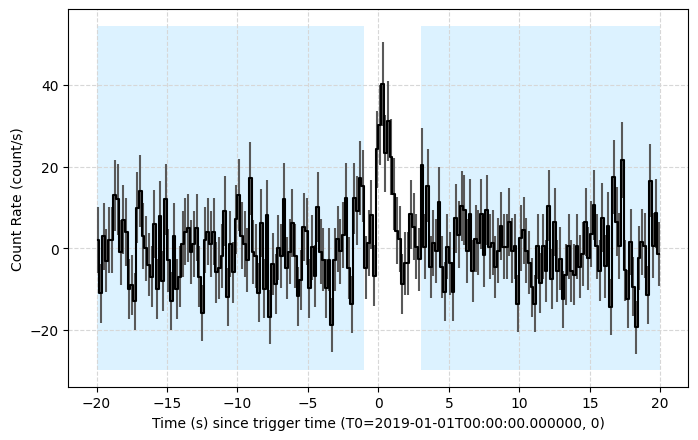

In [79]:
from gecam.plot.light_curve import LightCurveFigure

net_lc_x,net_lc_y,net_lc_y_err=duration_obj.net_lc_1D_data

det_sliced_lc_fig = LightCurveFigure((net_lc_x[:-1],net_lc_y,net_lc_y_err), trig_time=evt.info.trig_met, dpi=100)
det_sliced_lc_fig.add_background(bg_time_range=lc_bg_range)

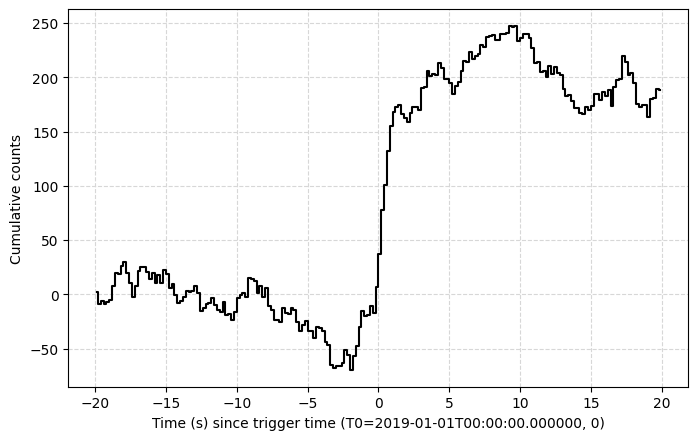

In [80]:
# 查看净光变的累计计数曲线，方便选取累计曲线的本底范围
set_time_range=None
cumsum_lc_fig = duration_obj.plot_light_curve_cumsum(set_time_range=set_time_range)

In [83]:
# 累计曲线的本底范围
cumsum_bg_range = [[ -4, -3], [5,6]]
t90, t90_err,t50, t50_err=duration_obj.cal_burst_duration_by_cumsum_counts(cumsum_bg_range)

print("T90:",t90,"T90误差:",t90_err)
print("T50:",t50,"T50误差:",t50_err)

IndexError: index -1 is out of bounds for axis 0 with size 0